In [15]:
import data_structures
import utils
import filters
import labeling
import pyfolio as pf
import pandas as pd

import numpy as np
import pandas as pd
import timeit
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
read_path = 'C:/Users/win/Desktop/afml_new_data/'

for i in os.listdir(read_path):
    df = pd.read_csv(read_path + i)
    break

In [17]:
df

,TIMESTAMP,PRICE,BID,ASK,V,DV
0,2018-01-02 09:01:43.692,19800,-2147483648,-2147483648,60,1188000
1,2018-01-02 09:03:06.747,19800,-2147483648,-2147483648,1,19800
2,2018-01-02 09:04:56.303,19800,-2147483648,-2147483648,110,2178000
3,2018-01-02 09:13:44.671,19800,20005,20030,1,19800
4,2018-01-02 09:20:01.166,19800,19900,19940,2000,39600000
5,2018-01-02 10:00:03.348,19980,19980,19985,213856,4272842880
6,2018-01-02 10:00:03.349,19985,19980,19985,2000,39970000
7,2018-01-02 10:00:03.349,19980,19980,19985,88,1758240
8,2018-01-02 10:00:03.349,19985,19980,19985,6000,119910000
9,2018-01-02 10:00:03.730,19985,19980,19985,100,1998500


In [18]:
dates = []
times = []
for i in df['TIMESTAMP'].index:
    timestamp = df['TIMESTAMP'].get_value(i, 'TIMESTAMP')
    dates.append(timestamp[0:10])
    times.append(timestamp[11:19])

C:\Users\Jay\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [19]:
df['date'] = pd.Series(dates, name='date')
df['time'] = pd.Series(times, name='time')
df_2018_01_02_drop_time = df[(df['date'] == '2018-01-02') & (df['time'] < '10:01:00')].index
df_2018_11_15_drop_time = df[(df['date'] == '2018-11-15') & (df['time'] < '10:01:00')].index
df = df.drop(index=df_2018_01_02_drop_time)
df = df.drop(index=df_2018_11_15_drop_time)
df = df.reset_index(drop=True)
df = df.drop(index=df[df['time'] < '09:01:00'].index).reset_index(drop=True)

In [21]:
df['price'] = df['PRICE'].astype(float)
df['date_time'] = df['TIMESTAMP']
df['volume'] = df['V'].astype(int)

In [23]:
df = df.set_index('TIMESTAMP')
df = df.sort_values(by='TIMESTAMP')
df_v = df.groupby(df.index).sum()
df = df.loc[~df.index.duplicated(keep='first')]
df['V'] = df_v['V']
df['DV'] = df_v['DV']

In [25]:
df['price'] = df['price'].astype(float)
df['volume'] = df['volume'].astype(int)

In [26]:
df = df[['date_time', 'price', 'volume']]

In [28]:
df.to_csv(read_path + 'TRADE_A233740_2018_dollar_bar_all.csv', index=False)

In [29]:
dollar_bar = data_structures.get_dollar_bars(file_path = read_path + 'TRADE_A233740_2018_dollar_bar_all.csv' , threshold=100000000)

Reading data in batches:
Batch number: 0
Returning bars 



In [30]:
data = dollar_bar.copy(deep=True)
data.index = pd.to_datetime(data['date_time'])
data = data.drop('date_time', axis=1)
data

,open,high,low,close,cum_vol,cum_dollar,cum_ticks
date_time,,,,,,,
2018-01-02 10:01:09.161,20060.0,20070.0,20045.0,20045.0,10165,203801545.0,35
2018-01-02 10:01:12.587,20045.0,20055.0,20040.0,20055.0,5325,106743695.0,15
2018-01-02 10:01:17.386,20055.0,20070.0,20050.0,20060.0,5204,104390080.0,23
2018-01-02 10:01:24.196,20060.0,20075.0,20060.0,20075.0,5193,104210290.0,22
2018-01-02 10:01:28.215,20075.0,20075.0,20065.0,20070.0,5161,103602200.0,17
2018-01-02 10:01:30.166,20070.0,20080.0,20070.0,20080.0,22872,459263860.0,11
2018-01-02 10:01:34.630,20080.0,20090.0,20080.0,20090.0,5078,102011440.0,24
2018-01-02 10:01:38.494,20090.0,20100.0,20085.0,20095.0,5128,103049240.0,36
2018-01-02 10:01:41.375,20095.0,20110.0,20095.0,20110.0,8696,174851450.0,18


## Fit a Primary Model: Trend Following
- Based on the simple moving average cross-over strategy

In [31]:
# compute moving averages 
fast_window = 20
slow_window = 50
data['fast_mavg'] = data['close'].rolling(window=fast_window, min_periods=fast_window, center=False).mean()
data['slow_mavg'] = data['close'].rolling(window=slow_window, min_periods=slow_window, center=False).mean()

In [32]:
data['side'] = np.nan

long_signals = data['fast_mavg'] >= data['slow_mavg']
short_signals = data['fast_mavg'] < data['slow_mavg']
data.loc[long_signals, 'side'] = 1
data.loc[short_signals, 'side'] = -1

# Remove Look ahead biase by lagging the signal
data['side'] = data['side'].shift(1)

In [33]:
# Save the raw data
raw_data = data.copy()

# Drop the NaN values from our data set
data.dropna(axis=0, how='any', inplace=True)

In [34]:
data['side'].value_counts()

 1.0    180516
-1.0    171719
Name: side, dtype: int64

## Filter Events: CUSUM Filter
- Predict what will happen when a CUSUM event is triggered. Use the signal from the MAvg Strategy to determine the side of the bet

In [36]:
# Compute daily volatility
daily_vol = utils.get_daily_vol(close=data['close'], lookback=5)

# Apply Symmetric CUSUM Filter and get timestamps for events
# Note: Only the CUSUM filter needs a point estimate for volatility
cusum_events = filters.cusum_filter(data['close'], threshold=daily_vol[:'2018-11-01'].mean()*0.5)

# # Compute vertical barrier
vertical_barriers = labeling.add_vertical_barrier(t_events=cusum_events, close=data['close'], num_days=1)

In [37]:
pt_sl = [1, 2]
min_ret = 0.005
triple_barrier_events = labeling.get_events(close=data['close'],
                                           t_events=cusum_events,
                                           pt_sl=pt_sl,
                                           target=daily_vol,
                                           min_ret=min_ret,
                                           num_threads=3,
                                           vertical_barrier_times=vertical_barriers,
                                           side_prediction=data['side'])

C:\Users\win\labeling.py:109: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  target = target.loc[t_events]
2019-05-23 19:44:07.073194 100.0% apply_pt_sl_on_t1 done after 0.04 minutes. Remaining 0.0 minutes..


In [38]:
labels = labeling.get_bins(triple_barrier_events, data['close'])
labels.side.value_counts()

-1.0    570
 1.0    548
Name: side, dtype: int64

## Results of Primary Model:
- What is the accuracy of predictions from the primary model(i.e., if the secondary model does not filter the bets)? what are the precision, recall, and F1-scores?

In [40]:
primary_forecast = pd.DataFrame(labels['bin'])
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

# Performance Metrics
actual = primary_forecast['actual']
pred = primary_forecast['pred']
print(classification_report(y_true=actual, y_pred=pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       537
          1       0.52      1.00      0.68       581

avg / total       0.27      0.52      0.36      1118

Confusion Matrix
[[  0 537]
 [  0 581]]

Accuracy
0.5196779964221825


C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Fit a Meta Model
- Train a random forest to decide whether to trade or not (i.e 1 or 0 respectively) since the earlier model has decided the side (-1 or 1)
- Create the following features:
    - 1) Volatility
    - 2) Serial Correlation
    - 3) The returns at the different lags from the serial correlation
    - 4) The sides from the SMavg Strategy

In [41]:
raw_data.head()

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,fast_mavg,slow_mavg,side
date_time,,,,,,,,,,
2018-01-02 10:01:09.161,20060.0,20070.0,20045.0,20045.0,10165,203801545.0,35,NaN,NaN,NaN
2018-01-02 10:01:12.587,20045.0,20055.0,20040.0,20055.0,5325,106743695.0,15,NaN,NaN,NaN
2018-01-02 10:01:17.386,20055.0,20070.0,20050.0,20060.0,5204,104390080.0,23,NaN,NaN,NaN
2018-01-02 10:01:24.196,20060.0,20075.0,20060.0,20075.0,5193,104210290.0,22,NaN,NaN,NaN
2018-01-02 10:01:28.215,20075.0,20075.0,20065.0,20070.0,5161,103602200.0,17,NaN,NaN,NaN


## Features

In [42]:
# Log Returns
raw_data['log_ret'] = np.log(raw_data['close']).diff()

# Momentum
raw_data['mom1'] = raw_data['close'].pct_change(periods=1)
raw_data['mom2'] = raw_data['close'].pct_change(periods=2)
raw_data['mom3'] = raw_data['close'].pct_change(periods=3)
raw_data['mom4'] = raw_data['close'].pct_change(periods=4)
raw_data['mom5'] = raw_data['close'].pct_change(periods=5)

# Volatility
raw_data['volatility_50'] = raw_data['log_ret'].rolling(window=50, min_periods=50, center=False).std()
raw_data['volatility_31'] = raw_data['log_ret'].rolling(window=31, min_periods=31, center=False).std()
raw_data['volatility_15'] = raw_data['log_ret'].rolling(window=15, min_periods=15, center=False).std()

# Serial Correlation (Takes about 4 minutes)
window_autocorr = 50

raw_data['autocorr_1'] = raw_data['log_ret'].rolling(window=window_autocorr, min_periods=window_autocorr, center=False).apply(lambda x: x.autocorr(lag=1), raw=False)
raw_data['autocorr_2'] = raw_data['log_ret'].rolling(window=window_autocorr, min_periods=window_autocorr, center=False).apply(lambda x: x.autocorr(lag=2), raw=False)
raw_data['autocorr_3'] = raw_data['log_ret'].rolling(window=window_autocorr, min_periods=window_autocorr, center=False).apply(lambda x: x.autocorr(lag=3), raw=False)
raw_data['autocorr_4'] = raw_data['log_ret'].rolling(window=window_autocorr, min_periods=window_autocorr, center=False).apply(lambda x: x.autocorr(lag=4), raw=False)
raw_data['autocorr_5'] = raw_data['log_ret'].rolling(window=window_autocorr, min_periods=window_autocorr, center=False).apply(lambda x: x.autocorr(lag=5), raw=False)

# Get the various log -t returns
raw_data['log_t1'] = raw_data['log_ret'].shift(1)
raw_data['log_t2'] = raw_data['log_ret'].shift(2)
raw_data['log_t3'] = raw_data['log_ret'].shift(3)
raw_data['log_t4'] = raw_data['log_ret'].shift(4)
raw_data['log_t5'] = raw_data['log_ret'].shift(5)

In [63]:
# Re compute sides
raw_data['side'] = np.nan

long_signals = raw_data['fast_mavg'] >= raw_data['slow_mavg']
short_signals = raw_data['fast_mavg'] < raw_data['slow_mavg']

raw_data.loc[long_signals, 'side'] = 1
raw_data.loc[short_signals, 'side'] = -1

In [64]:
# Remove look ahead bias
raw_data = raw_data.shift(1)

## Now get the data at the specified events

In [65]:
X = raw_data.loc[labels.index, :]

In [67]:
X.drop(['open', 'high', 'low', 'close', 'cum_vol', 'cum_dollar', 'cum_ticks','fast_mavg', 'slow_mavg',], axis=1, inplace=True)

,side,log_ret,mom1,mom2,mom3,mom4,mom5,volatility_50,volatility_31,volatility_15,autocorr_1,autocorr_2,autocorr_3,autocorr_4,autocorr_5,log_t1,log_t2,log_t3,log_t4,log_t5
2018-01-05 09:01:01.145,1.0,0.000251,0.000251,0.000251,0.000753,0.000251,0.000251,0.000627,0.000632,0.000625,-0.019073,0.212005,-0.130392,0.113869,-0.046838,0.000000,0.000502,-0.000502,0.000000,-0.000502
2018-01-08 09:01:01.087,1.0,-0.000934,-0.000933,0.000000,-0.000700,-0.000700,-0.000933,0.000387,0.000434,0.000598,-0.210313,0.003740,-0.138059,-0.063693,0.346240,0.000934,-0.000700,0.000000,-0.000233,0.000233
2018-01-08 09:01:10.714,1.0,0.000231,0.000231,0.000231,0.000462,0.011910,0.010966,0.001638,0.002066,0.002955,-0.109707,0.042427,-0.079943,-0.047964,-0.071602,0.000000,0.000231,0.011378,-0.000934,0.000934
2018-01-08 09:01:13.751,1.0,0.000000,0.000000,0.000231,0.000462,0.000693,0.000693,0.001634,0.002064,0.002958,-0.112610,0.041949,-0.081522,-0.021886,-0.025465,0.000231,0.000231,0.000231,0.000000,0.000231
2018-01-08 09:01:16.365,1.0,-0.000231,-0.000231,0.000231,0.000231,0.000461,0.000692,0.001636,0.002065,0.002964,-0.113903,0.042926,-0.082792,-0.022298,-0.026252,0.000461,0.000000,0.000231,0.000231,0.000231
2018-01-09 09:01:02.756,1.0,0.000662,0.000662,0.001768,0.001325,0.000883,0.000883,0.000398,0.000487,0.000627,-0.237503,-0.243759,-0.115846,0.218013,0.165922,0.001104,-0.000442,-0.000442,0.000000,0.001325
2018-01-10 09:04:01.097,1.0,0.000000,0.000000,-0.000221,-0.000221,0.001104,0.000662,0.001231,0.000898,0.001186,-0.231351,0.058277,0.058153,0.078592,-0.143107,-0.000221,0.000000,0.001325,-0.000442,0.001547
2018-01-10 14:47:52.794,1.0,-0.000899,-0.000899,0.000225,0.000450,0.001126,0.000901,0.000633,0.000652,0.000834,0.034324,-0.199932,-0.080240,-0.117636,-0.021963,0.001124,0.000225,0.000675,-0.000225,-0.001575
2018-01-10 14:48:55.939,1.0,0.000000,0.000000,-0.001125,-0.002023,-0.000900,-0.000675,0.000628,0.000679,0.000875,0.034046,-0.281370,-0.107522,-0.177761,-0.022034,-0.001125,-0.000899,0.001124,0.000225,0.000675
2018-01-10 14:49:01.196,1.0,-0.000676,-0.000676,-0.000676,-0.001800,-0.002697,-0.001575,0.000633,0.000674,0.000846,0.031417,-0.229775,-0.070902,-0.215035,-0.032725,0.000000,-0.001125,-0.000899,0.001124,0.000225


In [70]:
y = labels['bin']
y

2018-01-05 09:01:01.145    1
2018-01-08 09:01:01.087    0
2018-01-08 09:01:10.714    0
2018-01-08 09:01:13.751    1
2018-01-08 09:01:16.365    0
2018-01-09 09:01:02.756    0
2018-01-10 09:04:01.097    0
2018-01-10 14:47:52.794    1
2018-01-10 14:48:55.939    1
2018-01-10 14:49:01.196    1
2018-01-10 14:49:09.455    1
2018-01-11 09:05:29.744    0
2018-01-12 09:01:00.454    1
2018-01-12 09:01:01.033    1
2018-01-12 09:01:02.533    1
2018-01-12 14:08:05.315    0
2018-01-12 14:08:06.654    0
2018-01-12 14:08:07.992    0
2018-01-12 14:08:10.728    1
2018-01-12 14:08:11.058    1
2018-01-12 14:08:14.536    1
2018-01-12 14:08:16.880    1
2018-01-12 14:08:17.952    1
2018-01-12 14:08:19.436    0
2018-01-12 14:08:21.500    0
2018-01-12 14:08:49.300    1
2018-01-12 14:13:40.724    1
2018-01-12 14:14:03.434    1
2018-01-12 14:14:03.793    1
2018-01-12 14:17:35.844    1
                          ..
2018-12-20 09:01:02.434    0
2018-12-20 09:01:10.106    0
2018-12-20 09:01:25.341    0
2018-12-20 09:

In [ ]:
# Get features at event dates
X = raw_data.loc[labels.index, :]

# Drop unwanted columns
X.drop(['open', 'high', 'low', 'close', 'cum_vol', 'cum_dollar', 'cum_ticks','fast_mavg', 'slow_mavg',], axis=1, inplace=True)

y = labels['bin']

In [72]:
y.value_counts()

1    581
0    537
Name: bin, dtype: int64

## Balance classes

In [73]:
# Split data into traing, validation and test sets
X_training_validation = X['2018-01-01':'2018-11-01']
y_training_validation = y['2018-01-01':'2018-11-01']
X_train, X_validate, y_train, y_validate = train_test_split(X_training_validation, y_training_validation, test_size=0.2, shuffle=False)

In [74]:
train_df = pd.concat([y_train, X_train], axis=1, join='inner')
train_df['bin'].value_counts()

1    378
0    362
Name: bin, dtype: int64

In [75]:
# Upsample the training data to have a 50 - 50 split
# https://elitedatascience.com/imbalanced-classes
majority = train_df[train_df['bin'] == 0]
minority = train_df[train_df['bin'] == 1]

new_minority = resample(minority, 
                   replace=True,     # sample with replacement
                   n_samples=majority.shape[0],    # to match majority class
                   random_state=42)

train_df = pd.concat([majority, new_minority])
train_df = shuffle(train_df, random_state=42)

train_df['bin'].value_counts()

1    362
0    362
Name: bin, dtype: int64

In [76]:
train_df

,bin,side,log_ret,mom1,mom2,mom3,mom4,mom5,volatility_50,volatility_31,...,autocorr_1,autocorr_2,autocorr_3,autocorr_4,autocorr_5,log_t1,log_t2,log_t3,log_t4,log_t5
2018-08-16 09:01:17.714,0,-1.0,-0.001090,-0.001089,-0.000363,-0.036427,-0.036765,-0.036427,0.005222,0.006601,...,-0.035753,-0.002334,0.249729,-0.034076,0.169436,0.000726,-0.036744,-0.000350,0.000350,-0.001050
2018-08-03 09:02:04.785,1,1.0,0.000658,0.000658,0.000658,0.000658,0.000658,0.000000,0.002584,0.003208,...,-0.033991,-0.061217,-0.040082,-0.044560,-0.021502,0.000000,0.000000,0.000000,-0.000658,0.000000
2018-04-27 09:01:19.110,1,1.0,0.000000,0.000000,0.001159,0.020076,0.020076,0.021040,0.002682,0.003348,...,0.033243,0.018059,-0.126756,0.086882,0.148589,0.001158,0.018718,0.000000,0.000945,-0.000473
2018-01-23 09:01:05.724,0,1.0,-0.000405,-0.000405,-0.000203,-0.000405,-0.000405,-0.000203,0.000746,0.000629,...,-0.101377,0.093805,-0.023781,0.251007,-0.110461,0.000203,-0.000203,0.000000,0.000203,0.000608
2018-02-23 09:01:05.800,1,1.0,0.012504,0.012583,0.012583,0.012367,0.013015,0.012583,0.001826,0.002297,...,-0.155873,-0.006545,0.145496,-0.176543,-0.040903,0.000000,-0.000213,0.000640,-0.000427,-0.000213
2018-04-20 09:01:42.800,1,-1.0,0.002255,0.002258,0.004753,0.004753,0.004753,0.004753,0.000901,0.001033,...,0.194074,0.096912,0.009944,0.380723,0.345616,0.002487,0.000000,0.000000,0.000000,0.004083
2018-02-07 09:01:10.609,0,1.0,0.000206,0.000206,-0.000617,-0.000617,0.044039,0.043814,0.006227,0.007908,...,-0.017158,-0.027170,-0.014946,-0.078699,0.023930,-0.000823,0.000000,0.043714,-0.000215,0.000215
2018-02-27 09:01:09.570,0,1.0,0.001233,0.001234,0.001645,0.025263,0.025047,0.025047,0.003321,0.004181,...,-0.011321,0.020514,-0.118779,-0.142473,0.078459,0.000411,0.023305,-0.000211,0.000000,-0.000210
2018-06-21 09:19:19.162,0,1.0,-0.001089,-0.001089,-0.002175,-0.004611,-0.003800,-0.004341,0.000867,0.000977,...,0.347679,0.243270,0.206135,0.161276,-0.073499,-0.001088,-0.002444,0.000814,-0.000543,0.000000
2018-05-30 09:01:19.169,1,-1.0,0.000497,0.000497,0.019762,0.016671,0.009784,0.008772,0.003301,0.003854,...,-0.086358,-0.352577,-0.042629,-0.268032,-0.070313,0.019072,-0.003036,-0.006797,-0.001003,-0.002503


In [77]:
# Create training data
y_train = train_df['bin']
X_train= train_df.loc[:, train_df.columns != 'bin']

## Fit a Model

In [78]:
parameters = {'max_depth':[2, 3, 4, 5, 7],
              'n_estimators':[1, 10, 25, 50, 100, 256, 512],
              'random_state':[42]}
    
def perform_grid_search(X_data, y_data):
    rf = RandomForestClassifier(criterion='entropy')
    
    clf = GridSearchCV(rf, parameters, cv=4, scoring='roc_auc', n_jobs=3)
    
    clf.fit(X_data, y_data)
    
    print(clf.cv_results_['mean_test_score'])
    
    return clf.best_params_['n_estimators'], clf.best_params_['max_depth']

In [79]:
# extract parameters
n_estimator, depth = perform_grid_search(X_train, y_train)
c_random_state = 42
print(n_estimator, depth, c_random_state)

[0.51716266 0.58371296 0.63002297 0.65449747 0.64912405 0.65202443
 0.65486073 0.56423192 0.6180268  0.65858495 0.69119193 0.688955
 0.68993416 0.69433213 0.54616144 0.64738699 0.68963448 0.70700693
 0.71355446 0.7229754  0.73036347 0.58368699 0.71936214 0.74909268
 0.76116137 0.76505609 0.75978724 0.76694358 0.6281569  0.75722212
 0.79276236 0.81167068 0.811187   0.81346677 0.81157927]
256 7 42


In [80]:
# Refit a new model with best params, so we can see feature importance
rf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator,
                            criterion='entropy', random_state=c_random_state)

rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
rf.predict_proba(X_train)[:, 1]

array([[0.87226903, 0.12773097],
       [0.43723684, 0.56276316],
       [0.28267387, 0.71732613],
       ...,
       [0.81836605, 0.18163395],
       [0.38564206, 0.61435794],
       [0.41520844, 0.58479156]])

## Training Metrics

             precision    recall  f1-score   support

          0       0.98      0.87      0.92       362
          1       0.88      0.99      0.93       362

avg / total       0.93      0.93      0.93       724

Confusion Matrix
[[314  48]
 [  5 357]]

Accuracy
0.9267955801104972


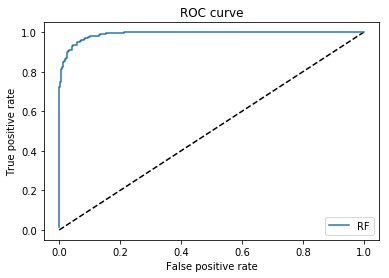

In [86]:
# Performance Metrics
y_pred_rf = rf.predict_proba(X_train)[:, 1]
y_pred = rf.predict(X_train)
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_pred_rf)
print(classification_report(y_train, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_train, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_train, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Validation Metrics

             precision    recall  f1-score   support

          0       0.44      0.59      0.51        79
          1       0.59      0.44      0.51       106

avg / total       0.53      0.51      0.51       185

Confusion Matrix
[[47 32]
 [59 47]]

Accuracy
0.5081081081081081


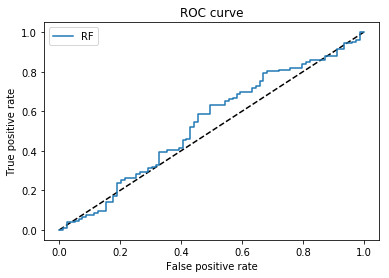

In [87]:
# Meta-label
# Performance Metrics
y_pred_rf = rf.predict_proba(X_validate)[:, 1]
y_pred = rf.predict(X_validate)
fpr_rf, tpr_rf, _ = roc_curve(y_validate, y_pred_rf)
print(classification_report(y_validate, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_validate, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_validate, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [88]:
print(X_validate.index.min())
print(X_validate.index.max())

2018-08-24 15:19:18.610000
2018-11-01 09:01:10.373000


In [90]:
primary_forecast = pd.DataFrame(labels['bin'])
primary_forecast['pred'] = 1

In [94]:
primary_forecast.columns = ['actual', 'pred']

In [95]:
primary_forecast

,actual,pred
2018-01-05 09:01:01.145,1,1
2018-01-08 09:01:01.087,0,1
2018-01-08 09:01:10.714,0,1
2018-01-08 09:01:13.751,1,1
2018-01-08 09:01:16.365,0,1
2018-01-09 09:01:02.756,0,1
2018-01-10 09:04:01.097,0,1
2018-01-10 14:47:52.794,1,1
2018-01-10 14:48:55.939,1,1
2018-01-10 14:49:01.196,1,1


In [96]:
start = primary_forecast.index.get_loc('2018-08-24 15:19:18.610000')
end = primary_forecast.index.get_loc('2018-11-01 09:01:10.373000') + 1

In [99]:
subset_prim = primary_forecast[start:end]

In [100]:
actual = subset_prim['actual']
pred = subset_prim['pred']
print(classification_report(y_true=actual, y_pred=pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        79
          1       0.57      1.00      0.73       106

avg / total       0.33      0.57      0.42       185



C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
print("Confusion Matrix")
print(confusion_matrix(actual, pred))

Confusion Matrix
[[  0  79]
 [  0 106]]


In [102]:
print('')
print("Accuracy")
print(accuracy_score(actual, pred))


Accuracy
0.572972972972973


In [ ]:
# Primary model
primary_forecast = pd.DataFrame(labels['bin'])
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

start = primary_forecast.index.get_loc('2018-08-24 15:19:18.610000')
end = primary_forecast.index.get_loc('2018-11-01 09:01:10.373000') + 1

subset_prim = primary_forecast[start:end]

# Performance Metrics
actual = subset_prim['actual']
pred = subset_prim['pred']
print(classification_report(y_true=actual, y_pred=pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

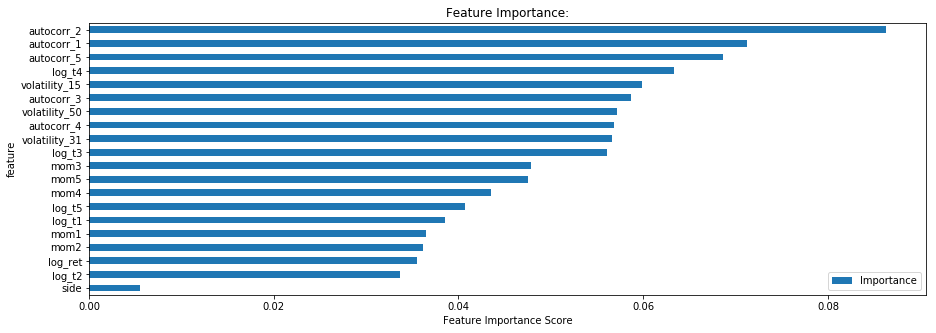

In [103]:
# Feature Importance
title = 'Feature Importance:'
figsize = (15, 5)

feat_imp = pd.DataFrame({'Importance':rf.feature_importances_})    
feat_imp['feature'] = X.columns
feat_imp.sort_values(by='Importance', ascending=False, inplace=True)
feat_imp = feat_imp

feat_imp.sort_values(by='Importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title=title, figsize=figsize)
plt.xlabel('Feature Importance Score')
plt.show()

## Performance Tear Sheets (In-Sample)
Without Meta Labeling

In [104]:
def get_daily_returns(intraday_returns):
    """
    This changes returns into daily returns that will work using pyfolio. Its not perfect...
    """
    
    cum_rets = ((intraday_returns + 1).cumprod())

    # Downsample to daily
    daily_rets = cum_rets.resample('B').last()

    # Forward fill, Percent Change, Drop NaN
    daily_rets = daily_rets.ffill().pct_change().dropna()
    
    return daily_rets

In [105]:
valid_dates = X_validate.index
base_rets = labels.loc[valid_dates, 'ret']
primary_model_rets = get_daily_returns(base_rets)

In [106]:
# Set-up the function to extract the KPIs from pyfolio
perf_func = pf.timeseries.perf_stats

In [107]:
# Save the statistics in a dataframe
perf_stats_all = perf_func(returns=primary_model_rets, 
                           factor_returns=None, 
                           positions=None,
                           transactions=None,
                           turnover_denom="AGB")
perf_stats_df = pd.DataFrame(data=perf_stats_all, columns=['Primary Model'])

pf.show_perf_stats(primary_model_rets)

Start date,2018-08-27
End date,2018-11-01
Total months,2
,Backtest
Annual return,24.9%
Cumulative returns,4.4%
Annual volatility,133.6%
Sharpe ratio,0.81
Calmar ratio,0.50
Stability,0.29
Max drawdown,-49.6%


## With Meta Labeling

In [109]:
meta_returns = labels.loc[valid_dates, 'ret'] * y_pred
daily_meta_rets = get_daily_returns(meta_returns)

In [110]:
# Save the KPIs in a dataframe
perf_stats_all = perf_func(returns=daily_meta_rets, 
                           factor_returns=None, 
                           positions=None,
                           transactions=None,
                           turnover_denom="AGB")

perf_stats_df['Meta Model'] = perf_stats_all

pf.show_perf_stats(daily_meta_rets)

Start date,2018-08-27
End date,2018-11-01
Total months,2
,Backtest
Annual return,147.4%
Cumulative returns,19.3%
Annual volatility,64.8%
Sharpe ratio,1.70
Calmar ratio,10.38
Stability,0.37
Max drawdown,-14.2%


## Perform out-of-sample test
- Meta Model Metrics

In [111]:
# extarct data for out-of-sample (OOS)
X_oos = X['2018-11-02':]
y_oos = y['2018-11-02':]

             precision    recall  f1-score   support

          0       0.46      0.58      0.52        96
          1       0.44      0.33      0.38        97

avg / total       0.45      0.46      0.45       193

Confusion Matrix
[[56 40]
 [65 32]]

Accuracy
0.45595854922279794


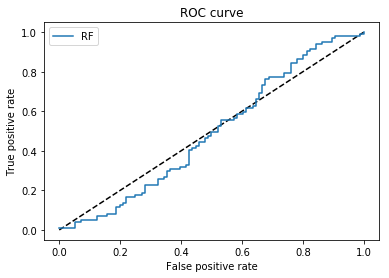

In [112]:
# Performance Metrics
y_pred_rf = rf.predict_proba(X_oos)[:, 1]
y_pred = rf.predict(X_oos)
fpr_rf, tpr_rf, _ = roc_curve(y_oos, y_pred_rf)
print(classification_report(y_oos, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_oos, y_pred))

print('')
print("Accuracy")
print(accuracy_score(y_oos, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [114]:
# Primary model
primary_forecast = pd.DataFrame(labels['bin'])
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

subset_prim = primary_forecast['2018-11-02':]

# Performance Metrics
actual = subset_prim['actual']
pred = subset_prim['pred']
print(classification_report(y_true=actual, y_pred=pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        96
          1       0.50      1.00      0.67        97

avg / total       0.25      0.50      0.34       193

Confusion Matrix
[[ 0 96]
 [ 0 97]]

Accuracy
0.5025906735751295


C:\Users\Jay\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
test_dates = X_oos.index

base_rets_oos = labels.loc[test_dates, 'ret']
primary_model_rets_oos = get_daily_returns(base_rets_oos)

# Save the statistics in a dataframe
perf_stats_all = perf_func(returns=primary_model_rets_oos, 
                           factor_returns=None, 
                           positions=None,
                           transactions=None,
                           turnover_denom="AGB")

perf_stats_df['Primary Model OOS'] = perf_stats_all


# pf.create_returns_tear_sheet(labels.loc[test_dates, 'ret'], benchmark_rets=None)
pf.show_perf_stats(primary_model_rets_oos)

Start date,2018-11-05
End date,2018-12-28
Total months,1
,Backtest
Annual return,-98.3%
Cumulative returns,-47.9%
Annual volatility,127.2%
Sharpe ratio,-2.54
Calmar ratio,-1.95
Stability,0.09
Max drawdown,-50.5%


Start date,2018-11-05
End date,2018-12-28
Total months,1
,Backtest
Annual return,-86.4%
Cumulative returns,-27.1%
Annual volatility,67.6%
Sharpe ratio,-2.60
Calmar ratio,-3.06
Stability,0.31
Max drawdown,-28.2%


C:\Users\Jay\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,23.91,2018-11-05,2018-12-21,NaT,NaN
1,0.00,2018-11-05,2018-11-05,2018-11-05,1
2,0.00,2018-11-05,2018-11-05,2018-11-05,1
3,0.00,2018-11-05,2018-11-05,2018-11-05,1
4,0.00,2018-11-05,2018-11-05,2018-11-05,1


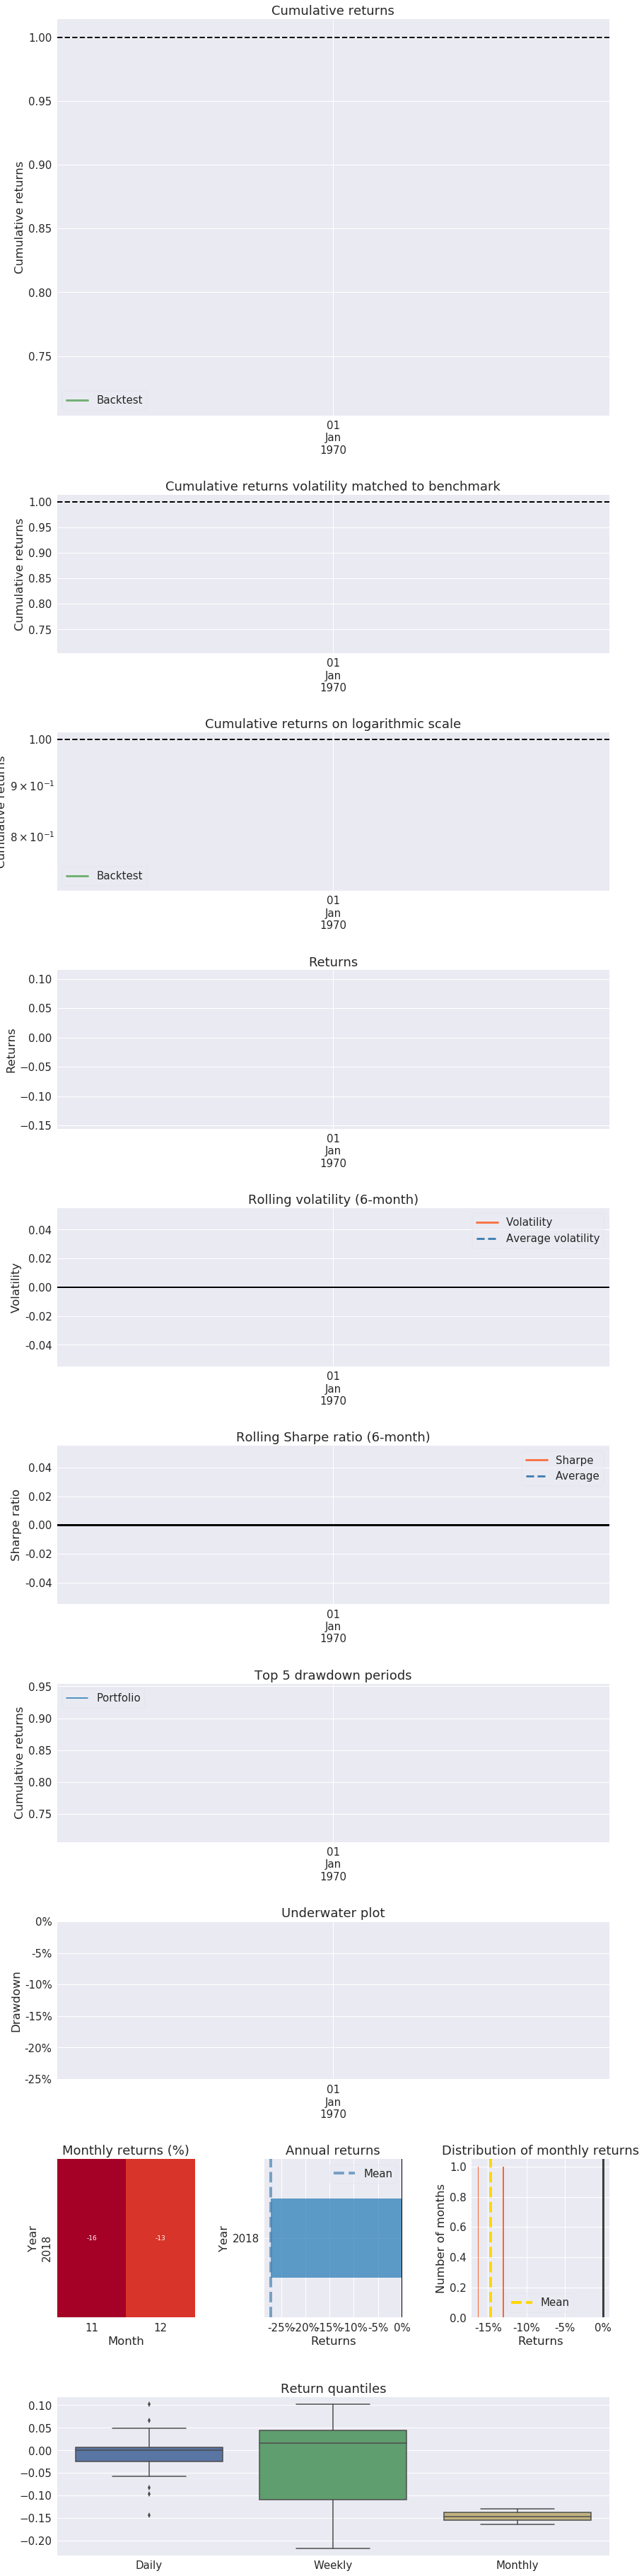

In [116]:
meta_returns = labels.loc[test_dates, 'ret'] * y_pred
daily_rets_meta = get_daily_returns(meta_returns)

# save the KPIs in a dataframe
perf_stats_all = perf_func(returns=daily_rets_meta, 
                           factor_returns=None, 
                           positions=None,
                           transactions=None,
                           turnover_denom="AGB")

perf_stats_df['Meta Model OOS'] = perf_stats_all

pf.create_returns_tear_sheet(daily_rets_meta, benchmark_rets=None)